In [7]:
!wget https://github.com/Automating-GIS-processes/Lesson-5-Making-Maps/raw/master/data/dataE5.zip
!unzip data5E.zip
!mv dataE5 L5_data

In [17]:
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt
import contextily as ctx

In [10]:
grid_fp = 'L5_data/TravelTimes_to_5975375_RailwayStation.shp'
roads_fp = 'L5_data/roads.shp'
metro_fp = 'L5_data/metro.shp'

grid = gpd.read_file(grid_fp)
roads = gpd.read_file(roads_fp)
metro = gpd.read_file(metro_fp)

In [11]:
print(roads.crs)
print(metro.crs)
print(grid.crs)

epsg:2392
epsg:2392
epsg:3067


In [12]:
print("Roads crs:", CRS(roads.crs).name)
print("Metro crs:", CRS(metro.crs).name)
print("Grid crs: ",CRS(grid.crs).name)

Roads crs: KKJ / Finland zone 2
Metro crs: KKJ / Finland zone 2
Grid crs:  ETRS89 / TM35FIN(E,N)


In [13]:
roads = roads.to_crs(crs=grid.crs)
metro = metro.to_crs(crs=grid.crs)

In [14]:
roads.crs == metro.crs == grid.crs

True

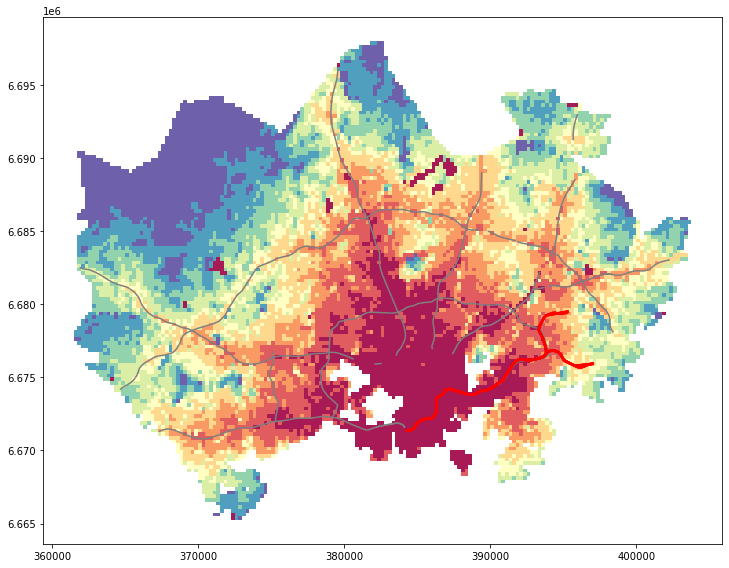

In [16]:
# For better control of the figure and axes, use the plt.subplots function before plotting the layers
# https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html#a-figure-with-just-one-subplot

# Control figure size in here
fig, ax = plt.subplots(figsize=(12,8))

# Visualize the travel times into 9 classes using "Quantiles" classification scheme
grid.plot(ax=ax, column="car_r_t", linewidth=0.03, cmap="Spectral", scheme="quantiles", k=9, alpha=0.9)

# Add roads on top of the grid
# (use ax parameter to define the map on top of which the second items are plotted)
roads.plot(ax=ax, color="grey", linewidth=1.5)

# Add metro on top of the previous map
metro.plot(ax=ax, color="red", linewidth=2.5)

# Remove the empty white-space around the axes
plt.tight_layout()

# Save the figure as png file with resolution of 300 dpi
outfp = "static_map.png"
plt.savefig(outfp, dpi=300)

# Save the figure as svg file
outfp = "static_map.svg"
plt.savefig(outfp, format='svg')

# Adding basemap from external source

In [18]:
grid.crs

<Projected CRS: EPSG:3067>
Name: ETRS89 / TM35FIN(E,N)
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Finland
- bounds: (19.08, 58.84, 31.59, 70.09)
Coordinate Operation:
- name: TM35FIN
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [19]:
data = grid.to_crs(epsg=3857)
data.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

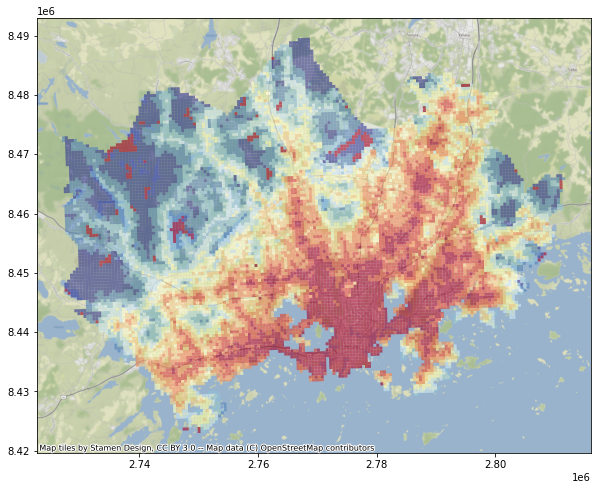

In [20]:
# Control figure size in here
fig, ax = plt.subplots(figsize=(12,8))

# Plot the data
data.plot(ax=ax, column='pt_r_t', cmap='RdYlBu', linewidth=0, scheme="quantiles", k=9, alpha=0.6)

# Add basemap
ctx.add_basemap(ax)

In [23]:
dir(ctx.tile_providers)

['OSM_A',
 'OSM_B',
 'OSM_C',
 'ST_TERRAIN',
 'ST_TERRAIN_BACKGROUND',
 'ST_TERRAIN_LABELS',
 'ST_TERRAIN_LINES',
 'ST_TONER',
 'ST_TONER_BACKGROUND',
 'ST_TONER_HYBRID',
 'ST_TONER_LABELS',
 'ST_TONER_LINES',
 'ST_TONER_LITE',
 'ST_WATERCOLOR',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__']

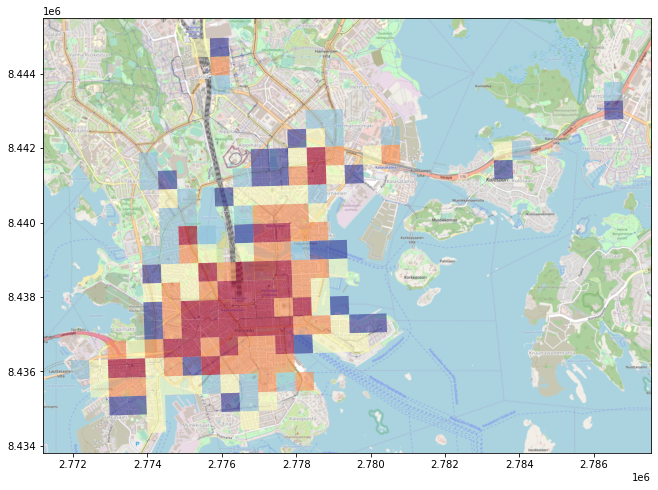

In [24]:
# Control figure size in here
fig, ax = plt.subplots(figsize=(12,8))

# Subset the data to seel only grid squares near the destination
subset = data.loc[(data['pt_r_t']>=0) & (data['pt_r_t']<=15)]

# Plot the data from subset
subset.plot(ax=ax, column='pt_r_t', cmap='RdYlBu', linewidth=0, scheme="quantiles", k=5, alpha=0.6)

# Add basemap with `OSM_A` style
ctx.add_basemap(ax, url=ctx.tile_providers.OSM_A)

(8435000.0, 8442500.0)

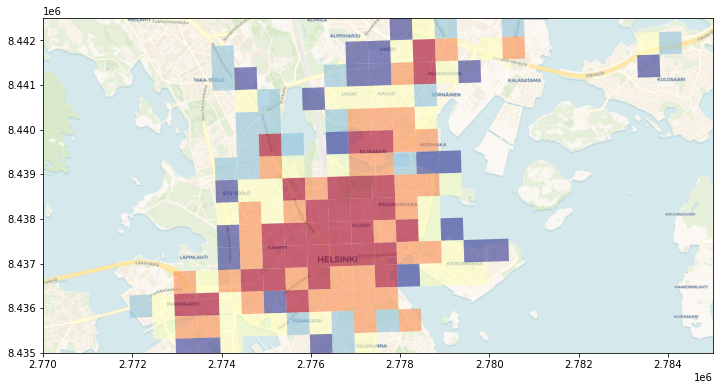

In [25]:
# Control figure size in here
fig, ax = plt.subplots(figsize=(12,8))

# The formatting should follow: 'https://{s}.basemaps.cartocdn.com/{style}/{z}/{x}/{y}{scale}.png'
# Specify the style to use
style = "rastertiles/voyager"
cartodb_url = 'https://a.basemaps.cartocdn.com/%s/{z}/{x}/{y}.png' % style

# Plot the data from subset
subset.plot(ax=ax, column='pt_r_t', cmap='RdYlBu', linewidth=0, scheme="quantiles", k=5, alpha=0.6)

# Add basemap with `OSM_A` style using zoom level of 14
ctx.add_basemap(ax, zoom=14, attribution="", url=cartodb_url)

# Crop the figure
ax.set_xlim(2770000, 2785000)
ax.set_ylim(8435000, 8442500)